In [1]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size =1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

-18.568610566809852 35.69916510159757
31.128940331577695 -12.33915815218154
13.598034443804906 -115.64976982527901
70.0039690966006 124.29088189703651
54.77365197315581 -167.35276838984774
85.38773166868768 70.64430621889653
-68.33429230271358 -133.99759701786792
-1.8558924113991253 -144.2184702477408
70.26800918732408 32.64923664567215
-81.98678302626341 165.92420612727608
-30.343983160784965 -164.33352081695196
-71.3997281383739 89.04751169146266
-12.466996409676497 -116.4683550522403
-60.103178419036425 -174.68614288428333
-72.18168931919351 27.720277767806266
29.57648390448699 -151.36090894055303
21.03511383770514 -160.51032049578268
-22.138243512742235 -47.55759545689236
-52.91094427396684 93.61978180643644
-38.53812181211477 -69.79005527291054
-20.62445422154859 88.0067958766611
32.61476922021582 -79.34392480557864
-77.97734223488263 -35.7727268324235
-48.90569050019191 -166.8552224696176
2.142648865795252 -121.68396824796488
-71.49771851318314 101.7028405181922
65.208684637 -72.

31.014856682320826 18.039897232628675
36.85788818710583 124.88034416980827
-43.41343627035576 -149.2589899972146
29.80019002864323 -119.73939339569225
48.444277621802115 -25.726723214522423
79.26708610433926 11.6328285144738
-51.176878068774144 56.68593256807702
8.93796605709845 54.1562294242685
-63.982856715387065 32.64259839530655
7.5395841818777996 28.17963773353054
37.52108073597603 -119.1704912675144
-89.90463900969769 75.89367775394513
22.909639057868688 96.37599962649767
-27.245276237597267 55.91787578922657
-71.75639076333542 -159.36524179549122
73.09196076266534 86.26912777286998
-24.764914688763056 97.96801596299866
65.36351563139652 163.19706990594943
65.90762178084853 134.27366821572116
-53.944144744960894 -151.54185168309033
-29.588951189684508 -86.92061376676281
48.459976214863076 -158.65073989953046
-83.83445100930535 -122.50710443064119


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

619

In [7]:
# Import the time library and the datetime module from the datetime library 

import time

from datetime import datetime

In [8]:
# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.

url = "https://api.openweathermap.org/data/2.5/weather?q="

In [10]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")

# Create counters.

record_count = 1

set_count = 1

# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)

    # Create endpoint URL with each
    
    city_url = url + city.replace(" ","+") + "&appid="+ weather_api_key

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
    # Run an API request for each of the cities.
    
    try:
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        
        print("City not found. Skipping...")
        
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | quelimane
Processing Record 2 of Set 1 | teguise
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | zhigansk
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | skalistyy
City not found. Skipping...
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | kahului
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | leme
Processing Record 18 of Set 1 | neuquen
Processing Record 19 of Set 1 | bengkulu
Processing Record 20 of Set 1 | mount pleasant
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 

Processing Record 40 of Set 4 | port moresby
Processing Record 41 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 42 of Set 4 | ponta do sol
Processing Record 43 of Set 4 | constitucion
Processing Record 44 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 45 of Set 4 | ancud
Processing Record 46 of Set 4 | labuhan
Processing Record 47 of Set 4 | ahipara
Processing Record 48 of Set 4 | armidale
Processing Record 49 of Set 4 | beringovskiy
Processing Record 50 of Set 4 | ostrogozhsk
Processing Record 1 of Set 5 | zhezkazgan
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | jaragua do sul
Processing Record 4 of Set 5 | victoria
Processing Record 5 of Set 5 | thompson
Processing Record 6 of Set 5 | tiquisio
Processing Record 7 of Set 5 | san patricio
Processing Record 8 of Set 5 | mandalgovi
Processing Record 9 of Set 5 | margate
Processing Record 10 of Set 5 | one hundred mile house
City not found. Skipping...
Processing Record

Processing Record 30 of Set 8 | tanjong karang
City not found. Skipping...
Processing Record 31 of Set 8 | cumra
Processing Record 32 of Set 8 | toora-khem
Processing Record 33 of Set 8 | surt
Processing Record 34 of Set 8 | uruzgan
Processing Record 35 of Set 8 | silver city
Processing Record 36 of Set 8 | primorsk
Processing Record 37 of Set 8 | kolosovka
Processing Record 38 of Set 8 | sechura
Processing Record 39 of Set 8 | wamba
Processing Record 40 of Set 8 | kaitangata
Processing Record 41 of Set 8 | puerto colombia
Processing Record 42 of Set 8 | kalmunai
Processing Record 43 of Set 8 | zemetchino
Processing Record 44 of Set 8 | azimur
City not found. Skipping...
Processing Record 45 of Set 8 | sinnamary
Processing Record 46 of Set 8 | rocha
Processing Record 47 of Set 8 | malayal
Processing Record 48 of Set 8 | stadtallendorf
Processing Record 49 of Set 8 | palu
Processing Record 50 of Set 8 | saint-philippe
Processing Record 1 of Set 9 | deputatskiy
Processing Record 2 of Set

Processing Record 19 of Set 12 | asau
Processing Record 20 of Set 12 | san clemente
Processing Record 21 of Set 12 | saint-joseph
Processing Record 22 of Set 12 | kirkland lake
Processing Record 23 of Set 12 | tchibanga
Processing Record 24 of Set 12 | faya
Processing Record 25 of Set 12 | starozhilovo
Processing Record 26 of Set 12 | meyungs
City not found. Skipping...
Processing Record 27 of Set 12 | ambulu
Processing Record 28 of Set 12 | djougou
Processing Record 29 of Set 12 | kabwe
Processing Record 30 of Set 12 | namibe
Processing Record 31 of Set 12 | mulchen
Processing Record 32 of Set 12 | umm kaddadah
Processing Record 33 of Set 12 | pangai
Processing Record 34 of Set 12 | gusinoye ozero
Processing Record 35 of Set 12 | dhidhdhoo
Processing Record 36 of Set 12 | yaan
Processing Record 37 of Set 12 | rio gallegos
Processing Record 38 of Set 12 | tuatapere
Processing Record 39 of Set 12 | porto murtinho
Processing Record 40 of Set 12 | vakhtan
Processing Record 41 of Set 12 | 

In [11]:
len(city_data)

575

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Quelimane,-17.8786,36.8883,289.12,100,20,1.03,MZ,2022-07-24 04:04:38
1,Teguise,29.0605,-13.5640,295.23,75,98,2.55,ES,2022-07-24 04:04:38
2,Cabo San Lucas,22.8909,-109.9124,300.10,84,88,2.29,MX,2022-07-24 04:00:01
3,Zhigansk,66.7697,123.3711,290.41,62,32,4.79,RU,2022-07-24 04:04:39
4,Bethel,41.3712,-73.4140,295.78,73,36,1.19,US,2022-07-24 04:04:39
5,Dikson,73.5069,80.5464,283.28,72,100,6.73,RU,2022-07-24 04:04:40
6,Rikitea,-23.1203,-134.9692,296.03,63,3,3.06,PF,2022-07-24 04:04:40
7,Atuona,-9.8000,-139.0333,298.28,72,27,7.28,PF,2022-07-24 04:04:41
8,Bluff,-46.6000,168.3333,281.93,78,8,1.42,NZ,2022-07-24 04:04:41
9,Avarua,-21.2078,-159.7750,295.18,56,20,2.57,CK,2022-07-24 04:04:42


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Quelimane,MZ,2022-07-24 04:04:38,-17.8786,36.8883,289.12,100,20,1.03
1,Teguise,ES,2022-07-24 04:04:38,29.0605,-13.5640,295.23,75,98,2.55
2,Cabo San Lucas,MX,2022-07-24 04:00:01,22.8909,-109.9124,300.10,84,88,2.29
3,Zhigansk,RU,2022-07-24 04:04:39,66.7697,123.3711,290.41,62,32,4.79
4,Bethel,US,2022-07-24 04:04:39,41.3712,-73.4140,295.78,73,36,1.19
5,Dikson,RU,2022-07-24 04:04:40,73.5069,80.5464,283.28,72,100,6.73
6,Rikitea,PF,2022-07-24 04:04:40,-23.1203,-134.9692,296.03,63,3,3.06
7,Atuona,PF,2022-07-24 04:04:41,-9.8000,-139.0333,298.28,72,27,7.28
8,Bluff,NZ,2022-07-24 04:04:41,-46.6000,168.3333,281.93,78,8,1.42
9,Avarua,CK,2022-07-24 04:04:42,-21.2078,-159.7750,295.18,56,20,2.57


In [14]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.

import time

# Get today's date in seconds.

today = time.time()

today

1658782165.2733145

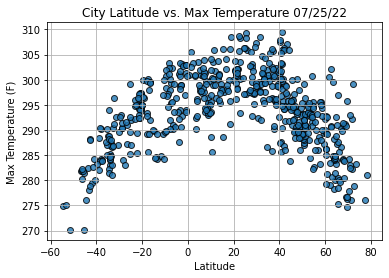

In [17]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            
            max_temps,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

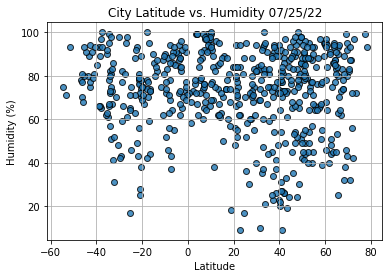

In [18]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            
            humidity,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

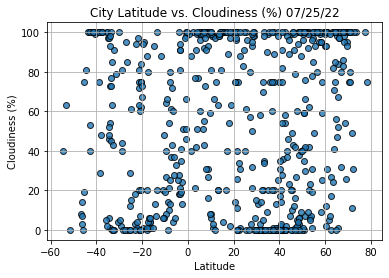

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            
            cloudiness,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

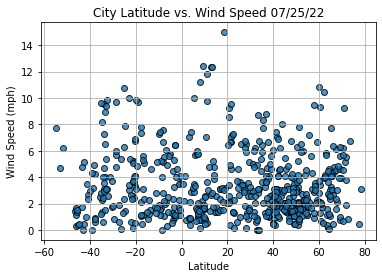

In [20]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            
            wind_speed,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()